In [34]:
import xuleta as xu
import numpy as np
from glob import glob
from scipy.stats import *
import struct
import pylab as plt
from scipy import interpolate

In [28]:
# Polynomial Regression
def polyfit(x, y, degree):
    results = []

    coeffs = np.polyfit(x, y, degree)

     # Polynomial Coefficients
    results.append(coeffs.tolist())

    # r-squared
    p = np.poly1d(coeffs)
    # fit values, and mean
    yhat = p(x)                         # or [p(z) for z in x]
    ybar = np.sum(y)/len(y)          # or sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    sstot = np.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
    results.append(ssreg / sstot)

    return results

In [41]:
def fill_nan(A):
    '''
    interpolate to fill nan values
    '''
    inds = np.arange(A.shape[0])
    good = np.where(np.isfinite(A))
    if len(good[0]) == 0:
        return np.nan_to_num(A)
    f = interpolate.interp1d(inds[good], A[good], bounds_error=False)
    B = np.where(np.isfinite(A), A, f(inds))
    return B

In [29]:
def linearly_interpolate_nans(y):
    # Fit a linear regression to the non-nan y values

    # Create X matrix for linreg with an intercept and an index
    X = np.vstack((np.ones(len(y)), np.arange(len(y))))

    # Get the non-NaN values of X and y
    X_fit = X[:, ~np.isnan(y)]
    y_fit = y[~np.isnan(y)].reshape(-1, 1)

    # Estimate the coefficients of the linear regression
    beta = np.linalg.lstsq(X_fit.T, y_fit)[0]

    # Fill in all the nan values using the predicted coefficients
    y.flat[np.isnan(y)] = np.dot(X[:, np.isnan(y)].T, beta)
    return y


In [48]:
def linregimages(l,nodata=-9999):
    import numpy as np
    import xuleta
    from progressbar import ProgressBar
    
    print('creating multidimensional array of %d images' %len(l))
    arrays = []
    pbar = ProgressBar()
    for i in pbar(l):
        a,m = xu.TifToArray(i)
        arrays.append(a)
        arrays2 = np.dstack(arrays)

    #time is equally spaced, so, we can do this
    x = np.arange(0,arrays2.shape[2],1)  
    
    print('the array has %f Mbytes' %(arrays2.nbytes/1024000))
    
    #POLYFIT version is slightly faster
    slope = np.zeros(shape=(arrays2.shape[0],arrays2.shape[1]))
    intercept = np.zeros(shape=(arrays2.shape[0],arrays2.shape[1]))
    rvalue = np.zeros(shape=(arrays2.shape[0],arrays2.shape[1]))
    
    for i in np.arange(0,arrays2.shape[0]):
        print('calculating row %d of %d' %(i,arrays2.shape[0]))
        line = ProgressBar()
        for j in line(np.arange(0,arrays2.shape[1])):
            #prepare array for regression (interpolate nan)
            y = arrays2[i,j,:]
            y = np.where(y == nodata, np.nan, y)
            
            #y2 = fill_nan(y)
            #res = polyfit(x,y2,1) 
            #slope[i,j] = res[0][0]
            #intercept[i,j] = res[0][1]
            #rvalue[i,j] = res[1]**2
            
            
            res = linregress(x,y) #0 slope
            slope[i,j] = res[0]
            intercept[i,j] = res[1]
            rvalue[i,j] = res[2]**2 #R-squared
            #pvalue[i,j] = res[3]

            res = None
    return slope, intercept, rvalue


In [38]:
k = np.array([np.nan,5,3,2,8,np.nan,5,8,7,9,np.nan])

In [39]:
linearly_interpolate_nans(k)

array([ 2.79166667,  5.        ,  3.        ,  2.        ,  8.        ,
        5.875     ,  5.        ,  8.        ,  7.        ,  9.        ,
        8.95833333])

In [42]:
fill_nan(k)

array([ 2.79166667,  5.        ,  3.        ,  2.        ,  8.        ,
        5.875     ,  5.        ,  8.        ,  7.        ,  9.        ,
        8.95833333])

In [8]:
f = "/home/denis/Downloads/VSWI_cemaden/"
esi = "/media/denis/seagate/ESI_2017/brasil_04gf/monthly_mean/"

In [10]:
l = glob(esi+"*-02*.tif")
l

['/media/denis/seagate/ESI_2017/brasil_04gf/monthly_mean/2001-02.tif',
 '/media/denis/seagate/ESI_2017/brasil_04gf/monthly_mean/2002-02.tif',
 '/media/denis/seagate/ESI_2017/brasil_04gf/monthly_mean/2003-02.tif',
 '/media/denis/seagate/ESI_2017/brasil_04gf/monthly_mean/2004-02.tif',
 '/media/denis/seagate/ESI_2017/brasil_04gf/monthly_mean/2005-02.tif',
 '/media/denis/seagate/ESI_2017/brasil_04gf/monthly_mean/2008-02.tif',
 '/media/denis/seagate/ESI_2017/brasil_04gf/monthly_mean/2009-02.tif',
 '/media/denis/seagate/ESI_2017/brasil_04gf/monthly_mean/2010-02.tif',
 '/media/denis/seagate/ESI_2017/brasil_04gf/monthly_mean/2012-02.tif',
 '/media/denis/seagate/ESI_2017/brasil_04gf/monthly_mean/2011-02.tif',
 '/media/denis/seagate/ESI_2017/brasil_04gf/monthly_mean/2013-02.tif',
 '/media/denis/seagate/ESI_2017/brasil_04gf/monthly_mean/2014-02.tif',
 '/media/denis/seagate/ESI_2017/brasil_04gf/monthly_mean/2015-02.tif',
 '/media/denis/seagate/ESI_2017/brasil_04gf/monthly_mean/2016-02.tif',
 '/med

In [49]:
%%time
s,i,r = linregimages(l)

creating multidimensional array of 17 images


100% |########################################################################|
/usr/local/lib/python3.5/dist-packages/scipy/stats/_stats_mstats_common.py:117: RuntimeWarning: invalid value encountered in absolute
  prob = 2 * distributions.t.sf(np.abs(t), df)


the array has 40.919531 Mbytes
calculating row 0 of 780


100% |########################################################################|


calculating row 1 of 780


100% |########################################################################|


calculating row 2 of 780
calculating row 3 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 4 of 780
calculating row 5 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 6 of 780
calculating row 7 of 780


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


calculating row 8 of 780
calculating row 9 of 780


100% |########################################################################|


calculating row 10 of 780
calculating row 11 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 12 of 780
calculating row 13 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 14 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 15 of 780
calculating row 16 of 780
calculating row 17 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 18 of 780
calculating row 19 of 780


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


calculating row 20 of 780
calculating row 21 of 780


100% |########################################################################|


calculating row 22 of 780
calculating row 23 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 24 of 780
calculating row 25 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 26 of 780
calculating row 27 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 28 of 780
calculating row 29 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 30 of 780
calculating row 31 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 32 of 780
calculating row 33 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 34 of 780
calculating row 35 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 36 of 780
calculating row 37 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 38 of 780
calculating row 39 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 40 of 780
calculating row 41 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 42 of 780
calculating row 43 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 44 of 780
calculating row 45 of 780


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


calculating row 46 of 780
calculating row 47 of 780


100% |########################################################################|


calculating row 48 of 780
calculating row 49 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 50 of 780
calculating row 51 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 52 of 780
calculating row 53 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 54 of 780
calculating row 55 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 56 of 780
calculating row 57 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 58 of 780
calculating row 59 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 60 of 780
calculating row 61 of 780


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


calculating row 62 of 780
calculating row 63 of 780


100% |########################################################################|


calculating row 64 of 780
calculating row 65 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 66 of 780
calculating row 67 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 68 of 780
calculating row 69 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 70 of 780
calculating row 71 of 780


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


calculating row 72 of 780
calculating row 73 of 780


100% |########################################################################|


calculating row 74 of 780
calculating row 75 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 76 of 780
calculating row 77 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 78 of 780
calculating row 79 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 80 of 780
calculating row 81 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 82 of 780
calculating row 83 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 84 of 780
calculating row 85 of 780


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


calculating row 86 of 780
calculating row 87 of 780


100% |########################################################################|


calculating row 88 of 780
calculating row 89 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 90 of 780
calculating row 91 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 92 of 780
calculating row 93 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 94 of 780
calculating row 95 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 96 of 780
calculating row 97 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 98 of 780
calculating row 99 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 100 of 780
calculating row 101 of 780


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


calculating row 102 of 780
calculating row 103 of 780


100% |########################################################################|


calculating row 104 of 780
calculating row 105 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 106 of 780
calculating row 107 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 108 of 780
calculating row 109 of 780


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


calculating row 110 of 780
calculating row 111 of 780


100% |########################################################################|


calculating row 112 of 780
calculating row 113 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 114 of 780
calculating row 115 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 116 of 780
calculating row 117 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 118 of 780
calculating row 119 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 120 of 780
calculating row 121 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 122 of 780
calculating row 123 of 780


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


calculating row 124 of 780
calculating row 125 of 780


100% |########################################################################|


calculating row 126 of 780
calculating row 127 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 128 of 780
calculating row 129 of 780


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


calculating row 130 of 780
calculating row 131 of 780


100% |########################################################################|


calculating row 132 of 780
calculating row 133 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 134 of 780
calculating row 135 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 136 of 780
calculating row 137 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 138 of 780
calculating row 139 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 140 of 780
calculating row 141 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 142 of 780
calculating row 143 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 144 of 780
calculating row 145 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 146 of 780
calculating row 147 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 148 of 780
calculating row 149 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 150 of 780
calculating row 151 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 152 of 780
calculating row 153 of 780


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


calculating row 154 of 780
calculating row 155 of 780


100% |########################################################################|


calculating row 156 of 780
calculating row 157 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 158 of 780
calculating row 159 of 780


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


calculating row 160 of 780
calculating row 161 of 780


100% |########################################################################|


calculating row 162 of 780
calculating row 163 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 164 of 780
calculating row 165 of 780


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


calculating row 166 of 780
calculating row 167 of 780


100% |########################################################################|


calculating row 168 of 780
calculating row 169 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 170 of 780
calculating row 171 of 780


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


calculating row 172 of 780
calculating row 173 of 780


100% |########################################################################|


calculating row 174 of 780
calculating row 175 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 176 of 780
calculating row 177 of 780


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


calculating row 178 of 780
calculating row 179 of 780


100% |########################################################################|


calculating row 180 of 780
calculating row 181 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 182 of 780
calculating row 183 of 780


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


calculating row 184 of 780
calculating row 185 of 780


100% |########################################################################|


calculating row 186 of 780
calculating row 187 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 188 of 780
calculating row 189 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 190 of 780
calculating row 191 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 192 of 780
calculating row 193 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 194 of 780
calculating row 195 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 196 of 780
calculating row 197 of 780


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


calculating row 198 of 780
calculating row 199 of 780


100% |########################################################################|


calculating row 200 of 780
calculating row 201 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 202 of 780
calculating row 203 of 780


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


calculating row 204 of 780
calculating row 205 of 780


100% |########################################################################|


calculating row 206 of 780
calculating row 207 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 208 of 780
calculating row 209 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 210 of 780
calculating row 211 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 212 of 780
calculating row 213 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 214 of 780
calculating row 215 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 216 of 780
calculating row 217 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 218 of 780
calculating row 219 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 220 of 780
calculating row 221 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 222 of 780
calculating row 223 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 224 of 780
calculating row 225 of 780


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


calculating row 226 of 780
calculating row 227 of 780


100% |########################################################################|


calculating row 228 of 780
calculating row 229 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 230 of 780
calculating row 231 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 232 of 780
calculating row 233 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 234 of 780
calculating row 235 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 236 of 780
calculating row 237 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 238 of 780
calculating row 239 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 240 of 780
calculating row 241 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 242 of 780
calculating row 243 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 244 of 780
calculating row 245 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 246 of 780
calculating row 247 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 248 of 780
calculating row 249 of 780


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


calculating row 250 of 780
calculating row 251 of 780


100% |########################################################################|


calculating row 252 of 780
calculating row 253 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 254 of 780
calculating row 255 of 780


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


calculating row 256 of 780
calculating row 257 of 780


100% |########################################################################|


calculating row 258 of 780
calculating row 259 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 260 of 780
calculating row 261 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 262 of 780
calculating row 263 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 264 of 780
calculating row 265 of 780


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


calculating row 266 of 780
calculating row 267 of 780


100% |########################################################################|


calculating row 268 of 780
calculating row 269 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 270 of 780
calculating row 271 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 272 of 780
calculating row 273 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 274 of 780
calculating row 275 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 276 of 780
calculating row 277 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 278 of 780
calculating row 279 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 280 of 780
calculating row 281 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 282 of 780
calculating row 283 of 780


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


calculating row 284 of 780
calculating row 285 of 780


100% |########################################################################|


calculating row 286 of 780
calculating row 287 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 288 of 780
calculating row 289 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 290 of 780
calculating row 291 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 292 of 780
calculating row 293 of 780


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


calculating row 294 of 780
calculating row 295 of 780


100% |########################################################################|


calculating row 296 of 780
calculating row 297 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 298 of 780
calculating row 299 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 300 of 780
calculating row 301 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 302 of 780
calculating row 303 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 304 of 780
calculating row 305 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 306 of 780
calculating row 307 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 308 of 780
calculating row 309 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 310 of 780
calculating row 311 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 312 of 780
calculating row 313 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 314 of 780
calculating row 315 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 316 of 780
calculating row 317 of 780


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


calculating row 318 of 780
calculating row 319 of 780


100% |########################################################################|


calculating row 320 of 780
calculating row 321 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 322 of 780
calculating row 323 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 324 of 780
calculating row 325 of 780


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


calculating row 326 of 780
calculating row 327 of 780


100% |########################################################################|


calculating row 328 of 780
calculating row 329 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 330 of 780
calculating row 331 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 332 of 780
calculating row 333 of 780


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


calculating row 334 of 780
calculating row 335 of 780


100% |########################################################################|


calculating row 336 of 780
calculating row 337 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 338 of 780
calculating row 339 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 340 of 780
calculating row 341 of 780


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


calculating row 342 of 780
calculating row 343 of 780


100% |########################################################################|


calculating row 344 of 780
calculating row 345 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 346 of 780
calculating row 347 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 348 of 780
calculating row 349 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 350 of 780
calculating row 351 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 352 of 780
calculating row 353 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 354 of 780
calculating row 355 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 356 of 780
calculating row 357 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 358 of 780
calculating row 359 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 360 of 780
calculating row 361 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 362 of 780
calculating row 363 of 780


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


calculating row 364 of 780
calculating row 365 of 780


100% |########################################################################|


calculating row 366 of 780
calculating row 367 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 368 of 780
calculating row 369 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 370 of 780
calculating row 371 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 372 of 780
calculating row 373 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 374 of 780
calculating row 375 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 376 of 780
calculating row 377 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 378 of 780
calculating row 379 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 380 of 780
calculating row 381 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 382 of 780
calculating row 383 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 384 of 780
calculating row 385 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 386 of 780
calculating row 387 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 388 of 780
calculating row 389 of 780


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


calculating row 390 of 780
calculating row 391 of 780


100% |########################################################################|


calculating row 392 of 780
calculating row 393 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 394 of 780
calculating row 395 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 396 of 780
calculating row 397 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 398 of 780
calculating row 399 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 400 of 780
calculating row 401 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 402 of 780
calculating row 403 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 404 of 780
calculating row 405 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 406 of 780
calculating row 407 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 408 of 780
calculating row 409 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 410 of 780
calculating row 411 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 412 of 780
calculating row 413 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 414 of 780
calculating row 415 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 416 of 780
calculating row 417 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 418 of 780
calculating row 419 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 420 of 780
calculating row 421 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 422 of 780
calculating row 423 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 424 of 780
calculating row 425 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 426 of 780
calculating row 427 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 428 of 780
calculating row 429 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 430 of 780
calculating row 431 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 432 of 780
calculating row 433 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 434 of 780
calculating row 435 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 436 of 780
calculating row 437 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 438 of 780
calculating row 439 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 440 of 780
calculating row 441 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 442 of 780
calculating row 443 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 444 of 780
calculating row 445 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 446 of 780
calculating row 447 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 448 of 780
calculating row 449 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 450 of 780
calculating row 451 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 452 of 780
calculating row 453 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 454 of 780
calculating row 455 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 456 of 780
calculating row 457 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 458 of 780
calculating row 459 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 460 of 780
calculating row 461 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 462 of 780
calculating row 463 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 464 of 780


100% |########################################################################|


calculating row 465 of 780
calculating row 466 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 467 of 780
calculating row 468 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 469 of 780


100% |########################################################################|


calculating row 470 of 780
calculating row 471 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 472 of 780
calculating row 473 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 474 of 780
calculating row 475 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 476 of 780
calculating row 477 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 478 of 780
calculating row 479 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 480 of 780
calculating row 481 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 482 of 780
calculating row 483 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 484 of 780
calculating row 485 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 486 of 780
calculating row 487 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 488 of 780
calculating row 489 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 490 of 780
calculating row 491 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 492 of 780
calculating row 493 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 494 of 780
calculating row 495 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 496 of 780
calculating row 497 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 498 of 780
calculating row 499 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 500 of 780
calculating row 501 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 502 of 780
calculating row 503 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 504 of 780
calculating row 505 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 506 of 780
calculating row 507 of 780


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


calculating row 508 of 780
calculating row 509 of 780


100% |########################################################################|


calculating row 510 of 780
calculating row 511 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 512 of 780


100% |########################################################################|


calculating row 513 of 780
calculating row 514 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 515 of 780
calculating row 516 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 517 of 780


100% |########################################################################|


calculating row 518 of 780
calculating row 519 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 520 of 780


100% |########################################################################|


calculating row 521 of 780
calculating row 522 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 523 of 780
calculating row 524 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 525 of 780
calculating row 526 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 527 of 780
calculating row 528 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 529 of 780
calculating row 530 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 531 of 780
calculating row 532 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 533 of 780
calculating row 534 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 535 of 780
calculating row 536 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 537 of 780
calculating row 538 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 539 of 780
calculating row 540 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 541 of 780
calculating row 542 of 780


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


calculating row 543 of 780
calculating row 544 of 780


100% |########################################################################|


calculating row 545 of 780
calculating row 546 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 547 of 780
calculating row 548 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 549 of 780
calculating row 550 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 551 of 780
calculating row 552 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 553 of 780
calculating row 554 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 555 of 780
calculating row 556 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 557 of 780
calculating row 558 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 559 of 780
calculating row 560 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 561 of 780
calculating row 562 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 563 of 780
calculating row 564 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 565 of 780
calculating row 566 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 567 of 780
calculating row 568 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 569 of 780
calculating row 570 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 571 of 780
calculating row 572 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 573 of 780
calculating row 574 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 575 of 780
calculating row 576 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 577 of 780
calculating row 578 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 579 of 780
calculating row 580 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 581 of 780
calculating row 582 of 780


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


calculating row 583 of 780
calculating row 584 of 780


100% |########################################################################|


calculating row 585 of 780
calculating row 586 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 587 of 780
calculating row 588 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 589 of 780
calculating row 590 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 591 of 780
calculating row 592 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 593 of 780
calculating row 594 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 595 of 780
calculating row 596 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 597 of 780
calculating row 598 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 599 of 780
calculating row 600 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 601 of 780
calculating row 602 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 603 of 780
calculating row 604 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 605 of 780
calculating row 606 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 607 of 780
calculating row 608 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 609 of 780
calculating row 610 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 611 of 780
calculating row 612 of 780


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


calculating row 613 of 780
calculating row 614 of 780


100% |########################################################################|


calculating row 615 of 780
calculating row 616 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 617 of 780
calculating row 618 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 619 of 780
calculating row 620 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 621 of 780
calculating row 622 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 623 of 780
calculating row 624 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 625 of 780
calculating row 626 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 627 of 780
calculating row 628 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 629 of 780
calculating row 630 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 631 of 780
calculating row 632 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 633 of 780
calculating row 634 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 635 of 780
calculating row 636 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 637 of 780
calculating row 638 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 639 of 780
calculating row 640 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 641 of 780
calculating row 642 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 643 of 780
calculating row 644 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 645 of 780
calculating row 646 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 647 of 780
calculating row 648 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 649 of 780
calculating row 650 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 651 of 780
calculating row 652 of 780


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


calculating row 653 of 780
calculating row 654 of 780


100% |########################################################################|


calculating row 655 of 780
calculating row 656 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 657 of 780
calculating row 658 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 659 of 780
calculating row 660 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 661 of 780
calculating row 662 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 663 of 780
calculating row 664 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 665 of 780
calculating row 666 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 667 of 780
calculating row 668 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 669 of 780
calculating row 670 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 671 of 780
calculating row 672 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 673 of 780
calculating row 674 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 675 of 780
calculating row 676 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 677 of 780
calculating row 678 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 679 of 780
calculating row 680 of 780


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


calculating row 681 of 780
calculating row 682 of 780


100% |########################################################################|


calculating row 683 of 780
calculating row 684 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 685 of 780
calculating row 686 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 687 of 780
calculating row 688 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 689 of 780
calculating row 690 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 691 of 780
calculating row 692 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 693 of 780
calculating row 694 of 780


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


calculating row 695 of 780
calculating row 696 of 780


100% |########################################################################|


calculating row 697 of 780
calculating row 698 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 699 of 780
calculating row 700 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 701 of 780
calculating row 702 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 703 of 780
calculating row 704 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 705 of 780
calculating row 706 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 707 of 780
calculating row 708 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 709 of 780
calculating row 710 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 711 of 780
calculating row 712 of 780


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


calculating row 713 of 780
calculating row 714 of 780


100% |########################################################################|


calculating row 715 of 780
calculating row 716 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 717 of 780
calculating row 718 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 719 of 780
calculating row 720 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 721 of 780


100% |########################################################################|


calculating row 722 of 780
calculating row 723 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 724 of 780
calculating row 725 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 726 of 780
calculating row 727 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 728 of 780
calculating row 729 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 730 of 780
calculating row 731 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 732 of 780
calculating row 733 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 734 of 780
calculating row 735 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 736 of 780
calculating row 737 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 738 of 780
calculating row 739 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 740 of 780
calculating row 741 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 742 of 780
calculating row 743 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 744 of 780
calculating row 745 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 746 of 780
calculating row 747 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 748 of 780
calculating row 749 of 780


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


calculating row 750 of 780
calculating row 751 of 780


100% |########################################################################|


calculating row 752 of 780
calculating row 753 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 754 of 780
calculating row 755 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 756 of 780
calculating row 757 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 758 of 780
calculating row 759 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 760 of 780
calculating row 761 of 780


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


calculating row 762 of 780
calculating row 763 of 780


100% |########################################################################|


calculating row 764 of 780
calculating row 765 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 766 of 780
calculating row 767 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 768 of 780
calculating row 769 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 770 of 780
calculating row 771 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 772 of 780
calculating row 773 of 780


100% |########################################################################|
100% |########################################################################|


calculating row 774 of 780
calculating row 775 of 780


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


calculating row 776 of 780
calculating row 777 of 780


100% |########################################################################|


calculating row 778 of 780
calculating row 779 of 780


100% |########################################################################|


CPU times: user 2min 24s, sys: 2.86 s, total: 2min 27s
Wall time: 2min 23s


100% |########################################################################|


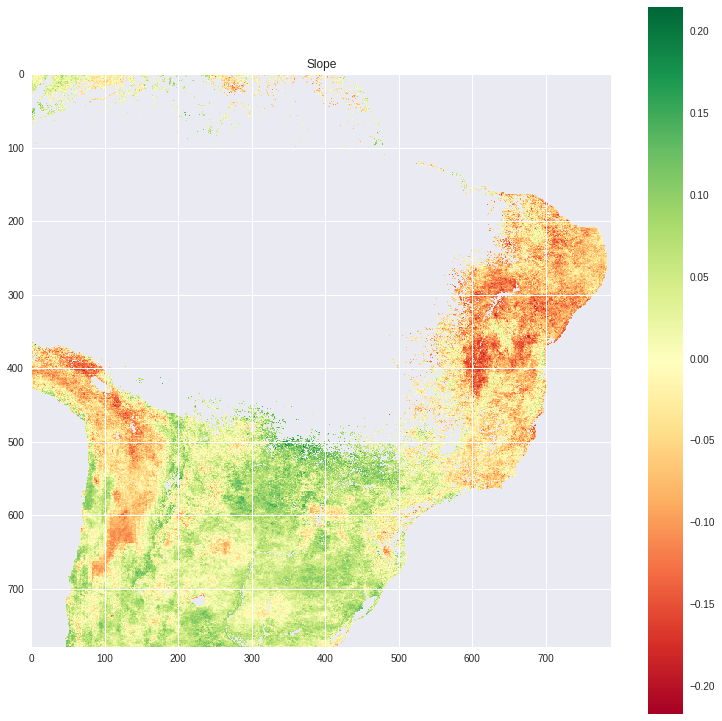

In [51]:
plt.figure(figsize=(13,13))
plt.imshow(s, cmap='RdYlGn')
#plt.clim(-1,1)

plt.title('Slope')
plt.colorbar()
plt.show()

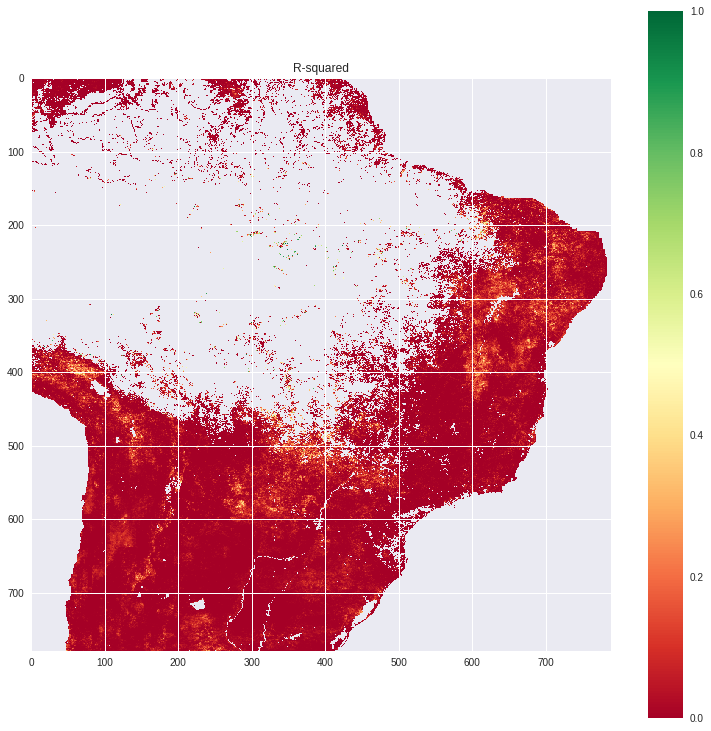

In [47]:
plt.figure(figsize=(13,13))
plt.imshow(r, cmap='RdYlGn')
plt.title('R-squared')
#plt.clim(0.001,0.6)
plt.colorbar()
plt.show()

In [19]:
l1 = glob(f+"*-05-*.tif")
l2 = glob(f+"*-06-*.tif")
l3 = glob(f+"*-07-*.tif")
l = sorted(l1+l2+l3)
l

['/home/denis/Downloads/VSWI_cemaden/2003-05-01.tif',
 '/home/denis/Downloads/VSWI_cemaden/2003-06-01.tif',
 '/home/denis/Downloads/VSWI_cemaden/2003-07-01.tif',
 '/home/denis/Downloads/VSWI_cemaden/2004-05-01.tif',
 '/home/denis/Downloads/VSWI_cemaden/2004-06-01.tif',
 '/home/denis/Downloads/VSWI_cemaden/2004-07-01.tif',
 '/home/denis/Downloads/VSWI_cemaden/2005-05-01.tif',
 '/home/denis/Downloads/VSWI_cemaden/2005-06-01.tif',
 '/home/denis/Downloads/VSWI_cemaden/2005-07-01.tif',
 '/home/denis/Downloads/VSWI_cemaden/2006-05-01.tif',
 '/home/denis/Downloads/VSWI_cemaden/2006-06-01.tif',
 '/home/denis/Downloads/VSWI_cemaden/2006-07-01.tif',
 '/home/denis/Downloads/VSWI_cemaden/2007-05-01.tif',
 '/home/denis/Downloads/VSWI_cemaden/2007-06-01.tif',
 '/home/denis/Downloads/VSWI_cemaden/2007-07-01.tif',
 '/home/denis/Downloads/VSWI_cemaden/2008-05-01.tif',
 '/home/denis/Downloads/VSWI_cemaden/2008-06-01.tif',
 '/home/denis/Downloads/VSWI_cemaden/2008-07-01.tif',
 '/home/denis/Downloads/VSWI

In [87]:
%%time
arrays = []
pbar = ProgressBar()
for i in pbar(l):
    a,m = xu.TifToArray(i)
    arrays.append(a)
    arrays2 = np.dstack(arrays)

#time is equally spaced, so, we can do this
x = np.arange(0,arrays2.shape[2],1)  
arrays2.nbytes/1024000

CPU times: user 18.3 s, sys: 512 ms, total: 18.8 s
Wall time: 18.7 s


100% |########################################################################|


In [59]:
%%time
#POLYFIT version is slightly faster
slope = np.zeros(shape=(arrays2.shape[0],arrays2.shape[1]))
intercept = np.zeros(shape=(arrays2.shape[0],arrays2.shape[1]))
rvalue = np.zeros(shape=(arrays2.shape[0],arrays2.shape[1]))


for i in np.arange(0,arrays2.shape[0]):
    for j in np.arange(0,arrays2.shape[1]):
        res = polyfit(x,arrays2[i,j,:],1) 
        slope[i,j] = res[0][0]
        intercept[i,j] = res[0][1]
        rvalue[i,j] = res[1]**2
        res = None

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


CPU times: user 14min 11s, sys: 632 ms, total: 14min 12s
Wall time: 14min 13s


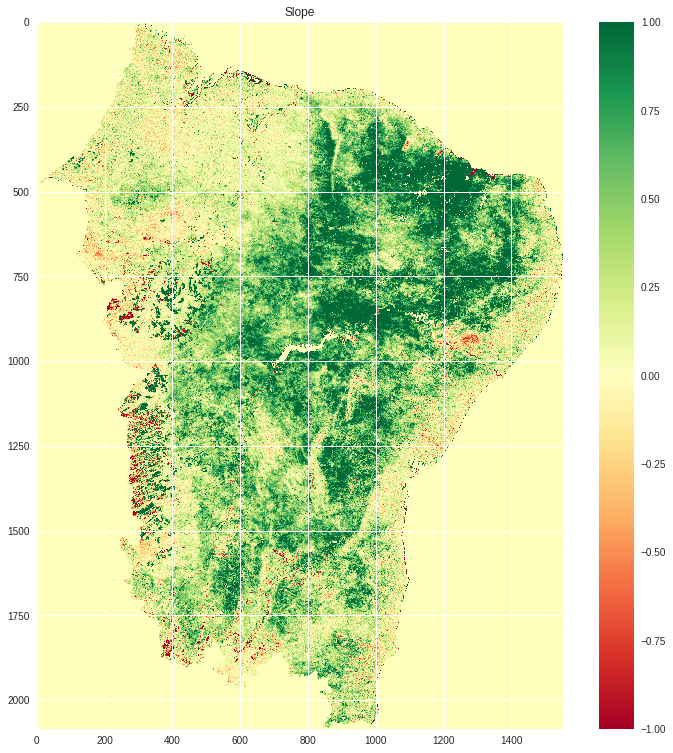

In [60]:
plt.figure(figsize=(13,13))
plt.imshow(slope, cmap='RdYlGn')
plt.clim(-1,1)

plt.title('Slope')
plt.colorbar()
plt.show()

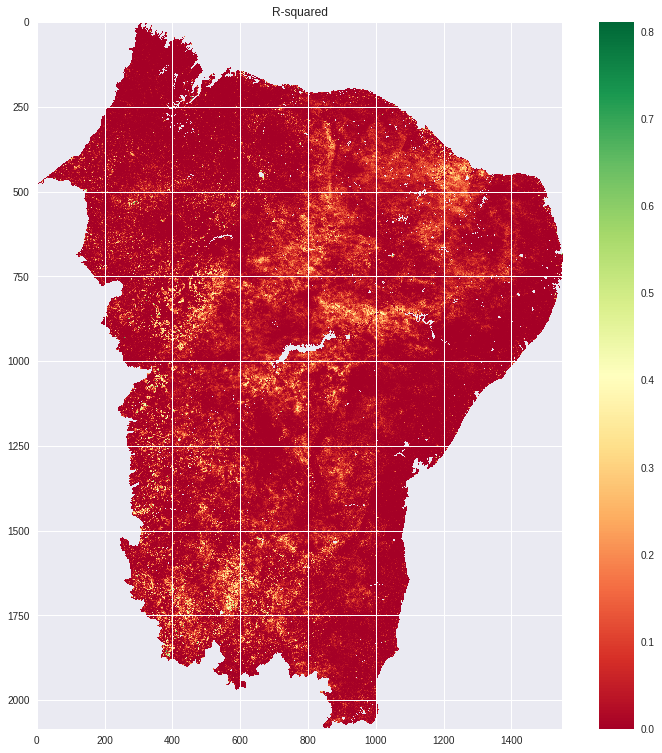

In [62]:
plt.figure(figsize=(13,13))
plt.imshow(rvalue, cmap='RdYlGn')
plt.title('R-squared')
#plt.clim(0.001,0.6)
plt.colorbar()
plt.show()

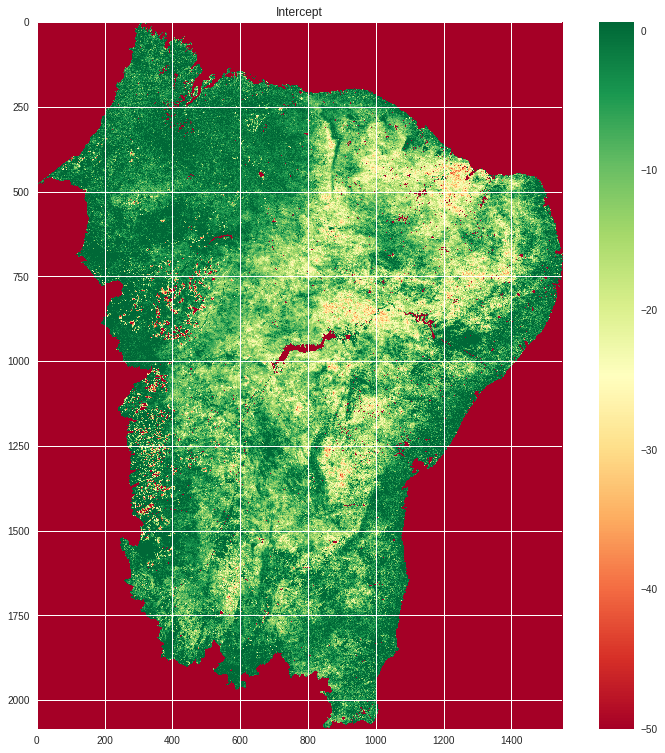

In [63]:
plt.figure(figsize=(13,13))
plt.imshow(intercept, cmap='RdYlGn')
plt.title('Intercept')
plt.clim(-50,0.6)
plt.colorbar()
plt.show()

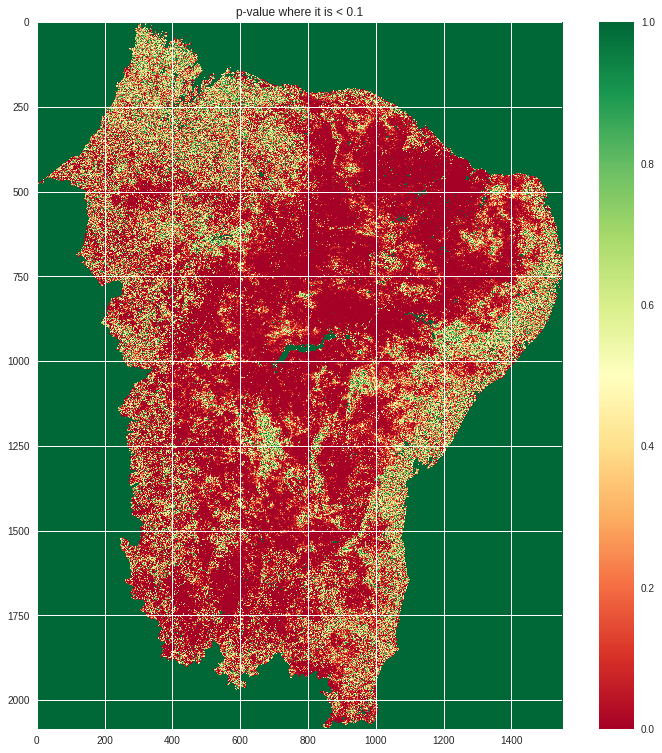

In [28]:
plt.figure(figsize=(13,13))
plt.imshow(pvalue, cmap='RdYlGn')
plt.title('p-value where it is < 0.1')
plt.clim(0,.1)
plt.colorbar()
plt.show()

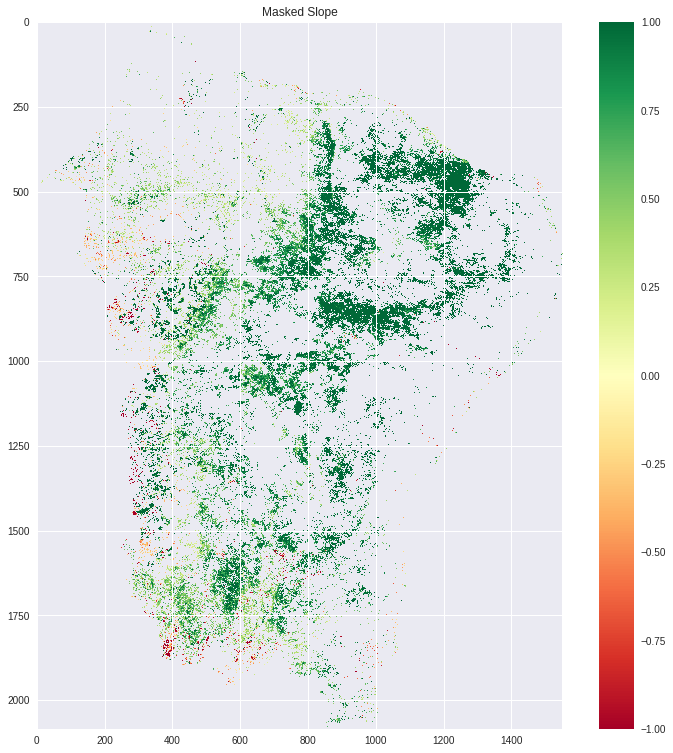

In [26]:
mask = np.where(rvalue<0.25, np.nan, 1)

plt.figure(figsize=(13,13))
plt.imshow(slope*mask, cmap='RdYlGn')
plt.clim(-1,1)

plt.title('Masked Slope')
plt.colorbar()
plt.show()